In [2]:
from utils import get_meta
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
import cv2
%matplotlib inline
from tqdm import tqdm


In [3]:
db='wiki'
mat_path='/home/geekysethi/Desktop/age-and-gender/age-and-gender/data/wiki_crop/wiki.mat'
full_path, dob, gender, photo_taken, face_score, second_face_score, age= get_meta(mat_path, db)

temp_dataframe={"full_path":full_path,'gender':gender,'face_score':face_score,'second_face_score':second_face_score,'age':age}
df=pd.DataFrame(temp_dataframe)
print(df.head())
train_dir='/home/geekysethi/Desktop/age-and-gender/age-and-gender/data/wiki_crop/'

img_size=50
LR=1e-3
model_name='ageandgender-{}-{}.model'.format(LR,'2conv_basic')


   age  face_score                          full_path  gender  \
0   28    4.300962  [17/10000217_1981-05-05_2009.jpg]     1.0   
1   39    2.645639  [48/10000548_1925-04-04_1964.jpg]     1.0   
2   59    4.329329    [12/100012_1948-07-03_2008.jpg]     1.0   
3   31        -inf  [65/10001965_1930-05-23_1961.jpg]     1.0   
4   41    3.408442  [16/10002116_1971-05-31_2012.jpg]     0.0   

   second_face_score  
0                NaN  
1           1.949248  
2                NaN  
3                NaN  
4                NaN  


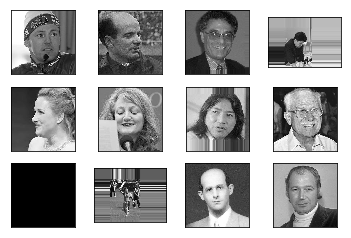

In [5]:
path=[]
type(df.full_path)
for i in df.full_path:
    i=str(i)[2:-2]
    path.append(os.path.join(train_dir,str(i)))
    
def show_images(path):
    fig=plt.figure()
    
    for num, img_no in enumerate(path[:12]):
        y=fig.add_subplot(3,4,num+1)
        img=cv2.imread(img_no,0)
        y.imshow(img,cmap='gray')
        y.axes.get_xaxis().set_visible(False)
        y.axes.get_yaxis().set_visible(False)

    
show_images(path)  

In [6]:
df.gender.isnull().sum()
df.drop(df[df.gender.isnull()==True].index,inplace=True)





In [7]:
import tflearn
from tflearn.layers.conv import conv_2d,max_pool_2d
from tflearn.layers.core import input_data,dropout,fully_connected
from tflearn.layers.estimator import regression

import tensorflow as tf
tf.reset_default_graph()

convnet=input_data(shape=[None,img_size,img_size,1],name='input')

convnet=conv_2d(convnet,32,5,activation='relu')
convnet=max_pool_2d(convnet,5)

convnet=conv_2d(convnet,64,5,activation='relu')
convnet=max_pool_2d(convnet,5)

convnet=fully_connected(convnet,1024,activation='relu')
convnet=dropout(convnet,0.8)

convnet=fully_connected(convnet,2,activation='softmax')
convnet=regression(convnet,optimizer='adam',learning_rate=LR,loss='categorical_crossentropy',name='targets')


model=tflearn.DNN(convnet,tensorboard_verbose=3)


# model.fit({'input':X},{'targets':Y},n_epoch=5,validation_set=({'input':X_test},{'targets':Y_test}),
# snapshot_step=500,show_metric=True,run_id=model_name)

# model.save(model_name)


In [8]:
model.load(model_name)

INFO:tensorflow:Restoring parameters from /home/geekysethi/Desktop/age-and-gender/age-and-gender/code/ageandgender-0.001-2conv_basic.model


In [9]:
test_path='/home/geekysethi/Desktop/age-and-gender/age-and-gender/data/test/*.jpg'
import glob
images_path=np.sort(glob.glob(test_path))
print(images_path[0])
len(images_path)

/home/geekysethi/Desktop/age-and-gender/age-and-gender/data/test/landmark_aligned_face.1556.10933770756_845493c795_o.jpg


35

In [34]:
model.predictor

In [35]:
model.evaluate

<bound method DNN.evaluate of <tflearn.models.dnn.DNN object at 0x7f790f0d64a8>>

[[ 0.  1.]]
[[ 0.  1.]]
[[ 0.  1.]]
[[ 0.  1.]]
[[ 0.  1.]]
[[ 0.  1.]]
[[ 0.  1.]]
[[ 0.  1.]]
[[ 0.  1.]]
[[ 0.  1.]]
[[ 0.  1.]]
[[ 0.  1.]]


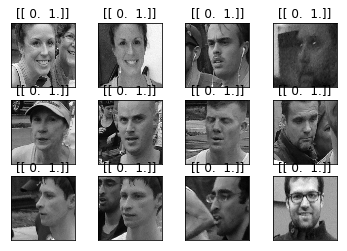

In [10]:

img_size=50
fig=plt.figure()
    
for num, i in enumerate(images_path[:12]):
#     print(num)
    img=cv2.imread(i,0)
    img1=cv2.resize(img,(img_size,img_size))
    img1=img1.reshape(-1,img_size,img_size,1)
    model_out=model.predict(img1)
    
    y=fig.add_subplot(3,4,num+1)
    plt.title(model_out)
    y.imshow(img,cmap='gray')
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)

    
    
    
    
    
    print(model_out)
    

